In [62]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)
import pandas as pd
from matplotlib import pyplot as plt
#%matplotlib widget

# Data

In [63]:
palm_file = './data/new/2024-12-09_11-22-43.emg8'
gestures = pd.read_csv(palm_file, sep= ' ', on_bad_lines='warn')
gestures = gestures.query('id != -1')

display(gestures.head())

GESTURES = gestures['state'].unique()
# renumerate gestures from zero
gestures['id'] = gestures['state'].replace({gesture: i for i, gesture in enumerate(GESTURES)})

display(gestures[['id', 'state']].drop_duplicates())

,ts,td,omg0,omg1,omg2,omg3,omg4,omg5,omg6,omg7,...,prb4,prb5,prb6,prb7,argmax,denoize,prot,state,id,now
125,228630.0,40.0,14614175.0,12879374.0,8433556.0,9199422.0,10380274.0,10742263.0,10149459.0,12061053.0,...,NaN,NaN,NaN,NaN,0.0,0.0,1,Neutral,0,5.00
126,228670.0,40.0,14614702.0,12880539.0,8419582.0,9195542.0,10381431.0,10743668.0,10150130.0,12067421.0,...,NaN,NaN,NaN,NaN,0.0,0.0,1,Neutral,0,5.04
127,228710.0,40.0,14611442.0,12874160.0,8414936.0,9191698.0,10382716.0,10744614.0,10147130.0,12067418.0,...,NaN,NaN,NaN,NaN,0.0,0.0,1,Neutral,0,5.08
128,228750.0,40.0,14607506.0,12859053.0,8409412.0,9189942.0,10380397.0,10740635.0,10146524.0,12068550.0,...,NaN,NaN,NaN,NaN,0.0,0.0,1,Neutral,0,5.12
129,228790.0,40.0,14605974.0,12865563.0,8414829.0,9190501.0,10380651.0,10742064.0,10151900.0,12068572.0,...,NaN,NaN,NaN,NaN,0.0,0.0,1,Neutral,0,5.16


/var/folders/mv/ftfl0v314yb6f8q9sbtv4m_c0000gn/T/ipykernel_25250/1226840005.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gestures['id'] = gestures['state'].replace({gesture: i for i, gesture in enumerate(GESTURES)})


,id,state
125,0,Neutral
225,1,ThumbFingers
375,2,Close
525,3,Open
675,4,Pinch
825,5,Indication
975,6,Wrist_Flex
1125,7,Wrist_Extend


In [64]:
gestures.columns

Index(['ts', 'td', 'omg0', 'omg1', 'omg2', 'omg3', 'omg4', 'omg5', 'omg6',
       'omg7', 'omg8', 'omg9', 'omg10', 'omg11', 'omg12', 'omg13', 'omg14',
       'omg15', 'emg0', 'emg1', 'emg2', 'emg3', 'emg4', 'emg5', 'emg6', 'emg7',
       'bno0', 'bno1', 'bno2', 'prb0', 'prb1', 'prb2', 'prb3', 'prb4', 'prb5',
       'prb6', 'prb7', 'argmax', 'denoize', 'prot', 'state', 'id', 'now'],
      dtype='object')

In [65]:
N_OMG_CH = 16

OMG_CH = [f'omg{i}' for i in range(N_OMG_CH)]

print(f"OMG_CH: {list(OMG_CH)}")

OMG_CH: ['omg0', 'omg1', 'omg2', 'omg3', 'omg4', 'omg5', 'omg6', 'omg7', 'omg8', 'omg9', 'omg10', 'omg11', 'omg12', 'omg13', 'omg14', 'omg15']


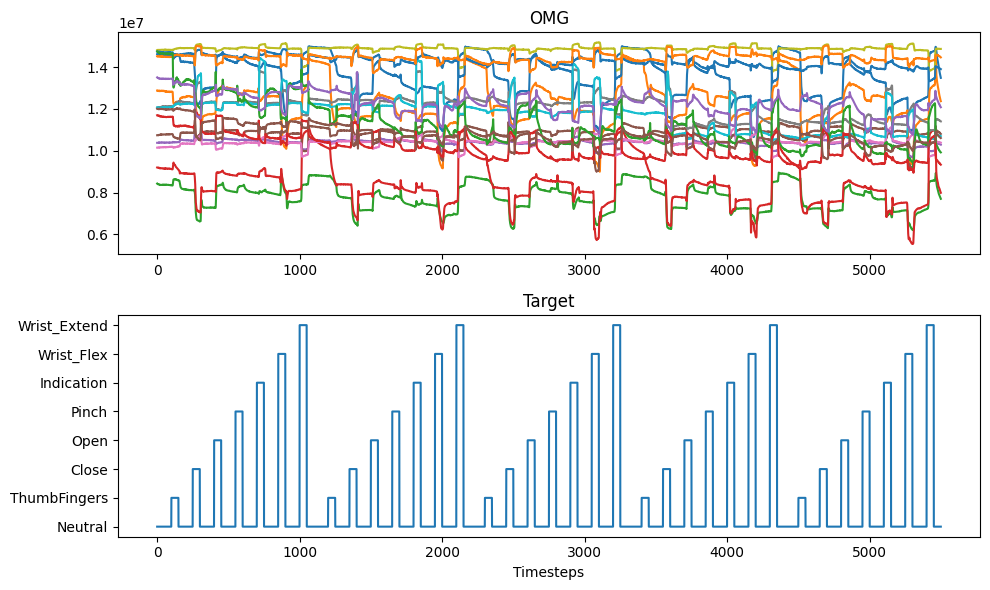

In [66]:
fig, axx = plt.subplots(2, 1, figsize=(10, 6))
plt.sca(axx[0])
plt.plot(gestures[OMG_CH].values)
plt.title('OMG')

plt.sca(axx[1])
plt.plot(gestures['id'].values)
plt.title('Target')
plt.yticks(np.arange(len(GESTURES)), GESTURES)

plt.xlabel('Timesteps')
plt.tight_layout()

# Dataset forming

In [67]:
last_train_idx = 3300
X_train = gestures[OMG_CH].values[:last_train_idx]
y_train = gestures['id'].values[:last_train_idx]

X_test = gestures[OMG_CH].values[last_train_idx:]
y_test = gestures['id'].values[last_train_idx:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3300, 16) (3300,)
(2200, 16) (2200,)


# Modeling

In [68]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(
    X=X_train,
    y=y_train
)

/Users/admin/Projects/Motorica/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

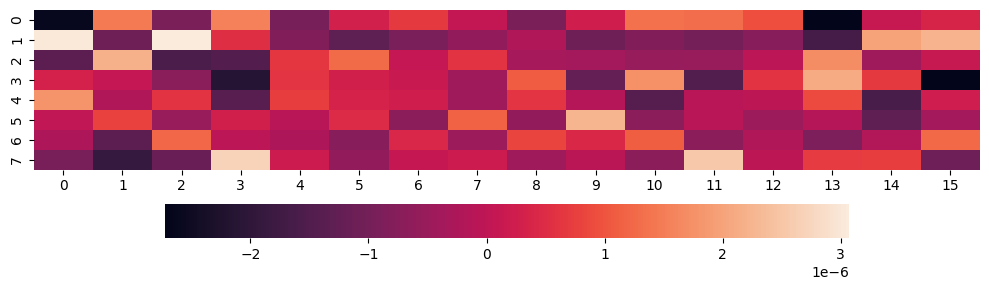

In [69]:
import seaborn as sns

plt.figure(figsize=(10, 3)) # 
sns.heatmap(model.coef_, cbar_kws={"orientation": "horizontal"})
plt.tight_layout()

## Prediction

In [70]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

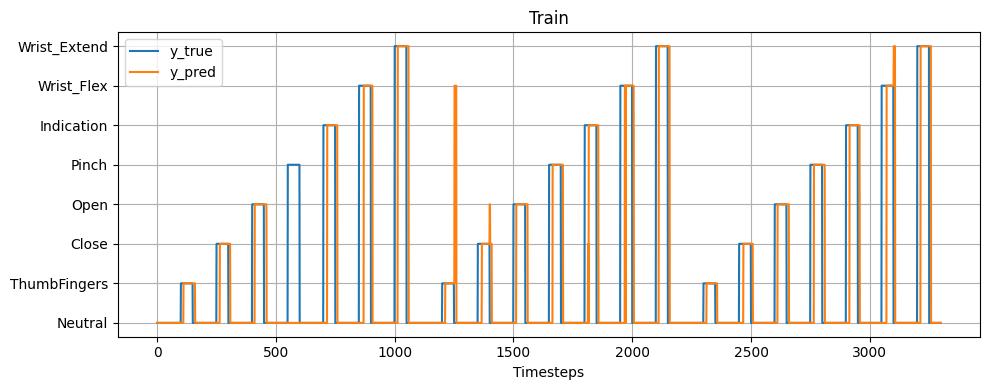

In [71]:
fig = plt.figure(figsize=(10, 4))
plt.plot(y_train,  c='C0', label='y_true')
plt.plot(y_pred_train, c='C1', label='y_pred')

plt.yticks(np.arange(len(GESTURES)), GESTURES)
plt.grid()
plt.xlabel('Timesteps')
plt.legend()
plt.title('Train')
plt.tight_layout()

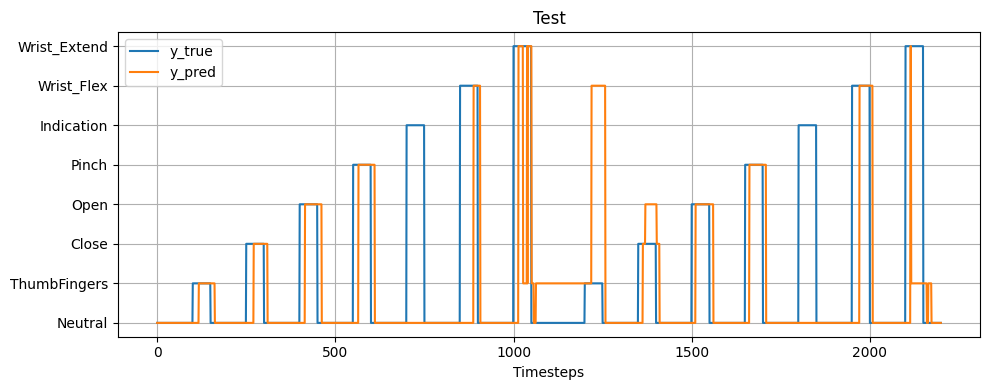

In [72]:
fig = plt.figure(figsize=(10, 4))
plt.plot(y_test,  c='C0', label='y_true')
plt.plot(y_pred_test, c='C1', label='y_pred')

plt.yticks(np.arange(len(GESTURES)), GESTURES)
plt.grid()
plt.xlabel('Timesteps')
plt.legend()
plt.title('Test')
plt.tight_layout()

## Metrics

In [73]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred_train, target_names=GESTURES))
print(classification_report(y_test, y_pred_test, target_names=GESTURES))

              precision    recall  f1-score   support

     Neutral       0.86      0.92      0.89      2250
ThumbFingers       0.85      0.75      0.80       150
       Close       0.80      0.67      0.73       150
        Open       0.78      0.77      0.77       150
       Pinch       0.78      0.47      0.58       150
  Indication       0.80      0.68      0.74       150
  Wrist_Flex       0.79      0.59      0.68       150
Wrist_Extend       0.78      0.74      0.76       150

    accuracy                           0.84      3300
   macro avg       0.81      0.70      0.74      3300
weighted avg       0.84      0.84      0.84      3300

              precision    recall  f1-score   support

     Neutral       0.81      0.83      0.82      1500
ThumbFingers       0.19      0.52      0.28       100
       Close       0.67      0.36      0.47       100
        Open       0.57      0.74      0.65       100
       Pinch       0.78      0.73      0.76       100
  Indication       0.00 

/Users/admin/Projects/Motorica/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/admin/Projects/Motorica/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/admin/Projects/Motorica/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

# Real-time inference

In [74]:
import time
import serial
from copy import deepcopy

## Inference Utils: Put your code here

In [75]:
def preprocessing(x):
    # x - sample vector
    y = x
    return y

def inference(x):
    y = model.predict_proba([x])[0]
    return y

def postprocessing(x, prev):
    if prev is None:
        y = x
    else:
        y = x*0.1 + prev*0.9 # Holt-Winters filter
    return y

## Inference

### Offline (dataset)

In [76]:
df_sim = gestures.iloc[last_train_idx:]
print(df_sim.shape)

(2200, 43)


In [77]:
TIMEOUT = 0.033
DEBUG = False
    
i = 0
ts_old = time.time()
ts_diff = 0;

y_previous = None
y_dct = {
    'omg_sample':[],
    'sample_preprocessed':[],
    
    'y_predicted':[],
    'y_postprocessed':[],
}
while True:    
    
    # [Data reading]
    ts_start = time.time()
    
    try:
        # [Sim data]
        if i < len(df_sim):
            sample = df_sim.values[i]
        else:
            break
        # [/Sim data]
        td_ts, omg_sample, _ = np.array_split(sample, [2, 2 + N_OMG_CH])
        
    except Exception as e:
        print(e)
        
    # [/Data Reading]
        
    # [Data preprocessing]
    sample_preprocessed = preprocessing(omg_sample.astype(float))
    # [/Data preprocessing]
    
    # [Inference]
    y_predicted         = inference(sample_preprocessed)
    # [/Inference]
    
    # [Inference Postprocessing]
    y_postprocessed     = postprocessing(y_predicted, y_previous)
    # [/Inference Postprocessing]
    
    # [Commands composition]
    # NO COMMANDS forming IN SIMULATION
    # [/Commands composition]
    
    # [Commands sending]
    # NO COMMANDS SENDING IN SIMULATION
    # [/Commands sending]
    
    # [Data logging]
    y_dct['omg_sample'].append(omg_sample)
    y_dct['sample_preprocessed'].append(sample_preprocessed)
    y_dct['y_predicted'].append(y_predicted)
    y_dct['y_postprocessed'].append(y_postprocessed)
    # [/Data logging]

    y_previous = y_postprocessed
    
    if DEBUG:
        # sanity check: Sizes of SAMPLE=65, OMG=16
        print(f'SAMPLE SIZE: {len(sample)}, OMG: {len(omg_sample)}', end='             \r')
    
    ts_diff = time.time() - ts_start
    # assert(ts_diff<TIMEOUT), 'Calculation cycle takes more than TIMEOUT, halting...'
    ts_old = ts_start
    i += 1 

In [78]:
for key, val in y_dct.items():
    # print(f"len({key}) = {len(y_dct[key])}")
    y_dct[key] = np.stack(val)
    print(f"{key}.shape = {y_dct[key].shape}")

omg_sample.shape = (2200, 16)
sample_preprocessed.shape = (2200, 16)
y_predicted.shape = (2200, 8)
y_postprocessed.shape = (2200, 8)


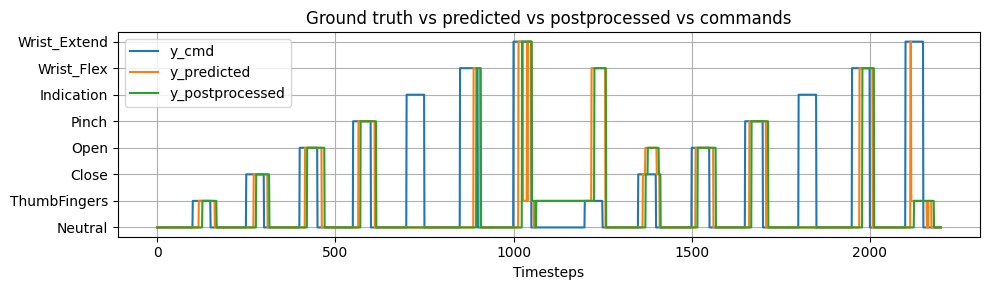

In [79]:
fig = plt.figure(figsize=(10, 3))

plt.plot(y_test, c='C0', label='y_cmd')
plt.plot(y_dct['y_predicted'].argmax(axis=1), c='C1', label='y_predicted')
plt.plot(y_dct['y_postprocessed'].argmax(axis=1), c='C2', label='y_postprocessed')

plt.title('Ground truth vs predicted vs postprocessed vs commands')
plt.yticks(np.arange(len(GESTURES)), GESTURES)
plt.legend()
plt.grid()
plt.xlabel('Timesteps')

plt.tight_layout()

In [80]:
print(classification_report(y_test, y_dct['y_postprocessed'].argmax(axis=1), target_names=GESTURES))

              precision    recall  f1-score   support

     Neutral       0.76      0.79      0.77      1500
ThumbFingers       0.19      0.50      0.27       100
       Close       0.58      0.28      0.38       100
        Open       0.47      0.62      0.54       100
       Pinch       0.67      0.61      0.64       100
  Indication       0.00      0.00      0.00       100
  Wrist_Flex       0.32      0.25      0.28       100
Wrist_Extend       0.93      0.26      0.41       100

    accuracy                           0.65      2200
   macro avg       0.49      0.41      0.41      2200
weighted avg       0.66      0.65      0.64      2200



/Users/admin/Projects/Motorica/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/admin/Projects/Motorica/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/admin/Projects/Motorica/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

### Online

#### Virtual hand

In [81]:
import VirtualPhantom
vp = VirtualPhantom.VirtualPhantomClient('localhost', 1755)

ModuleNotFoundError: No module named 'VirtualPhantom'

In [ ]:
GESTURES

array(['Neutral', 'ThumbFingers', 'Close', 'Open', 'Pinch', 'Indication',
       'Wrist_Flex', 'Wrist_Extend'], dtype=object)

In [ ]:
# Bindings for virtual hand
def commands(x):
    cmd = vp.neutral_state.copy()
    # for this mapping look at GESTURES
    if x == 0: # Pilot Neutral
        pass # Do nothing
    elif x == 1: # Pilot thumb_fingers
        # Virtual Hand thumb_fingers
        cmd.update({'thumb_flex': 1, 'index_extend': 1, 'middle_extend': 1, 'ring_extend': 1, 'pinky_extend': 1})
    elif x == 2: # Pilot close_state
        # Virtual Hand close_state
        cmd.update({'thumb_flex': 1, 'index_flex': 1, 'middle_flex': 1, 'ring_flex': 1, 'pinky_flex': 1})
    elif x == 3: # Pilot open_state
        cmd.update({'thumb_extend': 1, 'index_extend': 1, 'middle_extend': 1, 'ring_extend': 1, 'pinky_extend': 1})
    elif x == 4: # Pilot pinch_state
        cmd.update({'thumb_flex':1, 'index_flex': 1, 'middle_extend': 1, 'ring_extend': 1, 'pinky_extend': 1})
    elif x == 5: # Pilot indication_state
        cmd.update({ 'thumb_extend':1, 'index_extend': 1, 'middle_flex': 1, 'ring_flex': 1, 'pinky_flex': 1})
    elif x == 6: # Wrist_Flex
        cmd.update({'wrist_flex': 1})
    elif x == 7: # Wrist_Extend
        cmd.update({'wrist_extend': 1})
    else:
        pass # Do nothing
    
    return cmd

In [ ]:
!ls /dev/ttyACM* /dev/ttyUSB*

/bin/bash: /home/user/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
ls: cannot access '/dev/ttyUSB*': No such file or directory
 /dev/ttyACM0


In [ ]:
ser_name = '/dev/ttyACM0'
try:
    ser.close()
except:
    pass
ser = serial.Serial(ser_name, baudrate=115200, timeout=60);

ser.write('PT1\r\n'.encode())
time.sleep(0.1)
ser.write('Pt1\r\n'.encode())
time.sleep(0.1)
ser.flush()
time.sleep(0.1)

def parseline():
    line = ser.readline().decode().replace('\n', '')
    data = np.array(list(filter(len, np.array(line.split(" "))))).astype(float)
    return data

In [ ]:
TIMEOUT = 0.033
DEBUG = True

while(ser.in_waiting>50):
    ser.readline()
    time.sleep(0.005)
ser.readline()
    
t_start = time.time()
prev_idx = -1

y_previous = None
while True:    
    
    # [Data reading]
    t_rel = time.time() - t_start
    
    try: 
        data = parseline()
        data_line = ' '.join(data.astype(str))
        data_line += f' {-1} {"Inference"} {-1} {t_rel:.2f}'
    except Exception as e:
        raise(e)
        data_line = ' '.join(['-1']*n_cols)
        data_line += f' {-1} {"Error"} {-1} {t_rel:.2f}'

    td_ts, omg_sample, _ = np.array_split(data, [2, 2 + N_OMG_CH])        
    # [/Data Reading]
        
    # [Data preprocessing]
    sample_preprocessed   = preprocessing(omg_sample.astype(float))
    # [/Data preprocessing]
    
    # [Inference]
    y_predicted           = inference(sample_preprocessed)
    # [/Inference]
    
    # [Inference Postprocessing]
    y_postprocessed       = postprocessing(y_predicted, y_previous)
    y_postprocessed_label = y_postprocessed.argmax()
    # [/Inference Postprocessing]
    
    # [Commands composition]
    y_commands          = commands(y_postprocessed_label)
    # [/Commands composition]
    
    # [Commands sending]
    prot_idx = deepcopy(y_postprocessed_label)
    if (prot_idx != prev_idx):
        vp.send_cmd(**y_commands)
        prev_idx = deepcopy(prot_idx)
    # [/Commands sending]
    
    # [Data logging]
    # [/Data logging]

    y_previous = y_postprocessed.copy()
    time.sleep(0.001)
    t_rel = time.time() - t_start
    
    if DEBUG:
        # sanity check: Sizes of SAMPLE=65, OMG=16
        # print(f'SAMPLE SIZE: {len(sample)}, OMG: {len(omg_sample)}', end='             \r')
        # print(GESTURES[y_postprocessed_label], sample_preprocessed.tolist(), end='             \r')
        print(GESTURES[y_postprocessed_label], y_predicted, end='             \r')
    
    # assert(t_rel<TIMEOUT), 'Calculation cycle takes more than TIMEOUT, halting...'

KeyboardInterrupt: 